In [2]:
import tensorflow as tf
(X_train_full,y_train_full),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid,X_train = X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test/255.

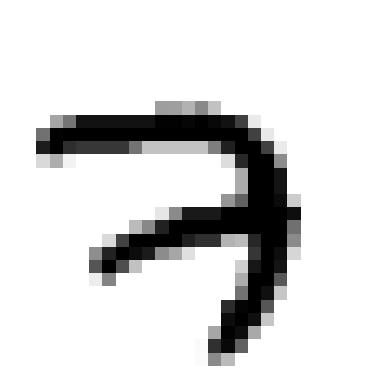

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [10]:
y_train

array([7, 3, 4, ..., 5, 6, 8], shape=(55000,), dtype=uint8)

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

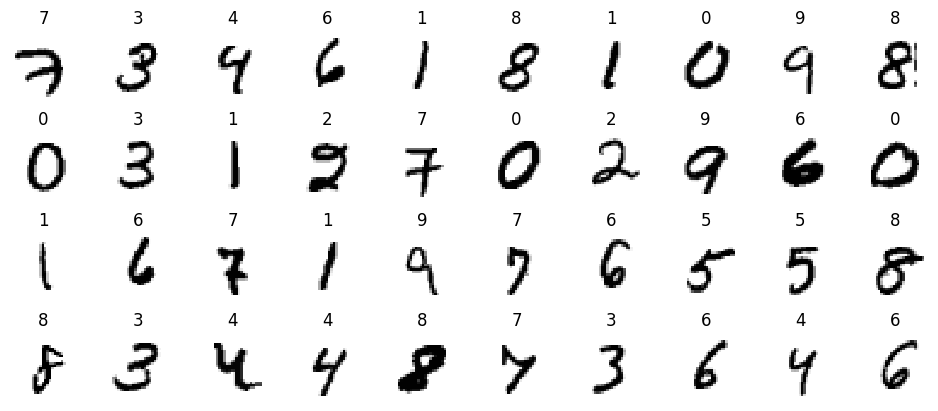

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2,n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows,n_cols,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [16]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self,factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self,bacth,logs=None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs['loss'])

In [19]:
import numpy as np
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss='sparse_categorical_crossentropy',optimizer = optimizer,
              metrics=['accuracy'])
expon_lr = ExponentialLearningRate(factor=1.005)

In [23]:
history = model.fit(X_train,y_train,epochs=1,
                    validation_data=(X_valid,y_valid),
                    callbacks=[expon_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6267 - loss: nan - val_accuracy: 0.0958 - val_loss: nan


Text(0, 0.5, 'Loss')

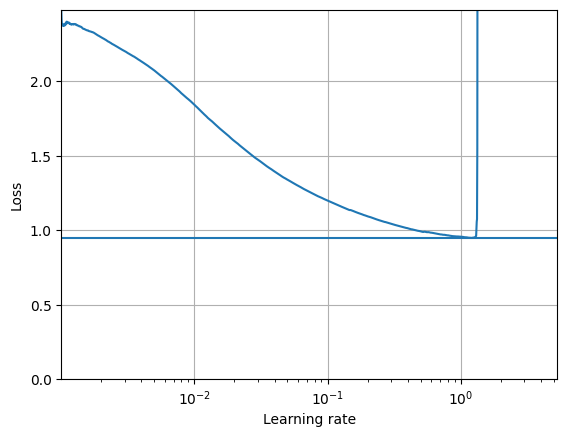

In [24]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [25]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
optimzer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])